# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [137]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [171]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-08-05') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-07-30,385.190002,375.070007,376.750000,384.760010,39532500.0,384.760010
2020-07-31,425.660004,403.299988,411.540009,425.040009,93584200.0,425.040009
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,435.750000


In [172]:
df.isna().sum().values,df.shape

(array([0, 0, 0, 0, 0, 0]), (2162, 6))

Create a graph to visualize the data.

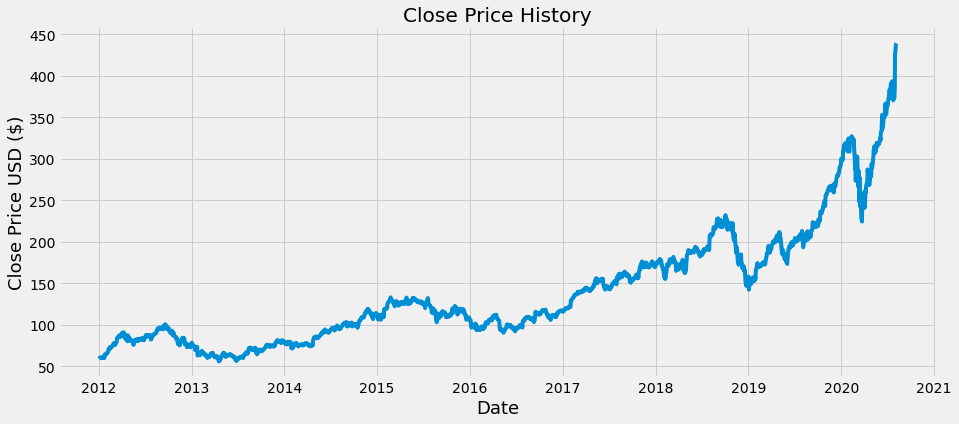

In [173]:
# df["High"].plot()
#Visualize the closing price history
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

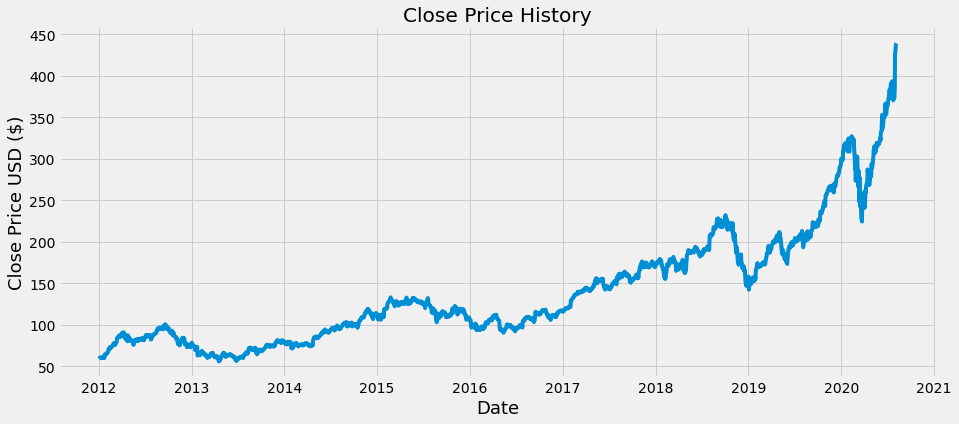

In [174]:
# df["High"].plot()
#Visualize the closing price history
plt.figure(figsize=(14,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [175]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [176]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00771234],
       [0.00853574],
       [0.01024586],
       ...,
       [0.99095011],
       [0.99853951],
       [1.        ]])

In [177]:
dataset.shape,scaled_data.shape

((2162, 1), (2162, 1))

In [178]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


In [146]:
df[["Close"]].values[2,0]

59.718570709228516

In [179]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [180]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [181]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.00771234],
        [0.00853574],
        [0.01024586],
        ...,
        [0.08064425],
        [0.08343859],
        [0.08460848]],

       [[0.00853574],
        [0.01024586],
        [0.01187402],
        ...,
        [0.08343859],
        [0.08460848],
        [0.08171728]],

       [[0.01024586],
        [0.01187402],
        [0.0116244 ],
        ...,
        [0.08460848],
        [0.08171728],
        [0.07787602]],

       ...,

       [[0.42195447],
        [0.41642544],
        [0.41533003],
        ...,
        [0.40205512],
        [0.39824741],
        [0.38776309]],

       [[0.41642544],
        [0.41533003],
        [0.41535613],
        ...,
        [0.39824741],
        [0.38776309],
        [0.36090029]],

       [[0.41533003],
        [0.41535613],
        [0.41650368],
        ...,
        [0.38776309],
        [0.36090029],
        [0.35584069]]])

In [182]:
x_train.shape

(1670, 60, 1)

## Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [183]:
from keras.layers import Dropout

In [184]:
#Build the LSTM network model
model = Sequential()

# LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

In [185]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [186]:
#Train the model
model.fit(x_train, y_train, batch_size=20, epochs=10)

Epoch 1/10
84/84 [==============================] - 2s 22ms/step - loss: 0.0031
Epoch 2/10
84/84 [==============================] - 2s 21ms/step - loss: 8.3764e-04
Epoch 3/10
84/84 [==============================] - 2s 21ms/step - loss: 7.1391e-04
Epoch 4/10
84/84 [==============================] - 2s 21ms/step - loss: 5.6236e-04
Epoch 5/10
84/84 [==============================] - 2s 22ms/step - loss: 6.1649e-04
Epoch 6/10
84/84 [==============================] - 2s 21ms/step - loss: 6.0394e-04
Epoch 7/10
84/84 [==============================] - 2s 21ms/step - loss: 4.8933e-04
Epoch 8/10
84/84 [==============================] - 2s 21ms/step - loss: 5.0356e-04
Epoch 9/10
84/84 [==============================] - 2s 21ms/step - loss: 5.1891e-04
Epoch 10/10
84/84 [==============================] - 2s 22ms/step - loss: 4.3629e-04


In [187]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [188]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [163]:
x_test

array([[0.53054049, 0.53058498, 0.52666723, ..., 0.58926183, 0.58164901,
        0.58939538],
       [0.53058498, 0.52666723, 0.52212628, ..., 0.58164901, 0.58939538,
        0.5840976 ],
       [0.52666723, 0.52212628, 0.50614368, ..., 0.58939538, 0.5840976 ,
        0.58107023],
       ...,
       [0.62229545, 0.64112724, 0.64086013, ..., 0.94688811, 0.95708301,
        0.96015487],
       [0.64112724, 0.64086013, 0.63275753, ..., 0.95708301, 0.96015487,
        0.97658263],
       [0.64086013, 0.63275753, 0.64891817, ..., 0.96015487, 0.97658263,
        0.99755134]])

In [189]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [190]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [191]:
predictions

array([[198.32057],
       [195.85977],
       [193.87965],
       [191.80066],
       [189.1845 ],
       [186.41904],
       [183.44763],
       [180.74118],
       [178.3782 ],
       [176.89072],
       [175.9642 ],
       [175.39194],
       [175.53413],
       [175.53027],
       [175.29832],
       [174.49648],
       [173.48174],
       [172.34264],
       [171.24806],
       [170.39859],
       [169.37584],
       [168.21367],
       [167.20558],
       [165.999  ],
       [164.46977],
       [162.41739],
       [159.91362],
       [158.0575 ],
       [156.67377],
       [155.69785],
       [155.16022],
       [154.95139],
       [153.83717],
       [152.67667],
       [151.55086],
       [150.73581],
       [150.36224],
       [150.33054],
       [150.40875],
       [150.38692],
       [150.5252 ],
       [150.88855],
       [151.43295],
       [152.11987],
       [152.59271],
       [152.94102],
       [153.09793],
       [153.48666],
       [153.88686],
       [154.14844],


In [192]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

15.787316730663264

## PLot the result 

/home/funnyeoman/python-environments/yeo/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


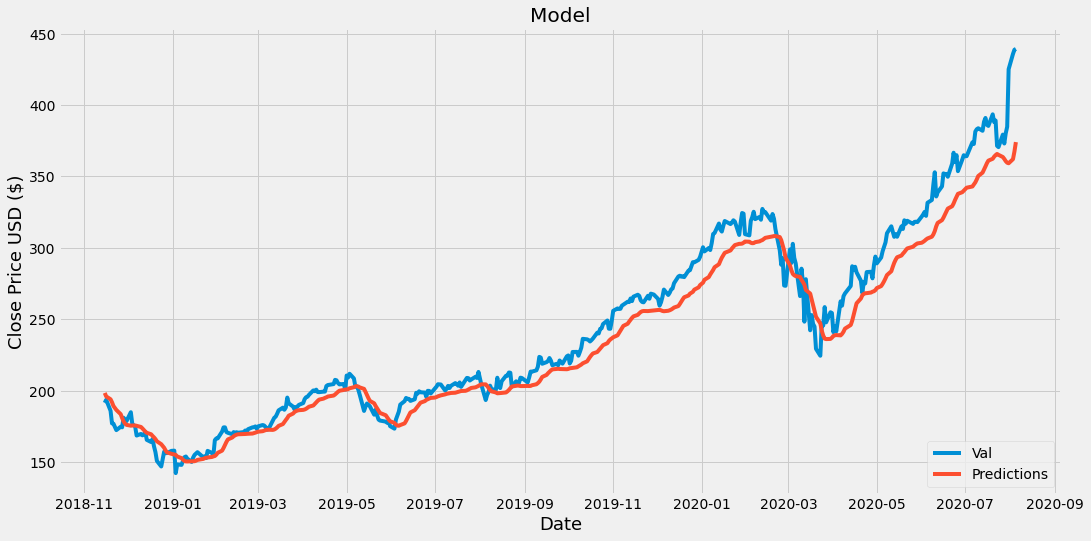

In [195]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'Val', 'Predictions'], loc='lower right')
plt.show()

## Show Y vs Ypred

In [196]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-11-15,191.410004,198.320572
2018-11-16,193.529999,195.859772
2018-11-19,185.860001,193.879654
2018-11-20,176.979996,191.800659
2018-11-21,176.779999,189.184494
...,...,...
2020-07-30,384.760010,359.551849
2020-07-31,425.040009,359.162811
2020-08-03,435.750000,362.037628
